In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import seaborn as sns
%matplotlib inline

df = pd.read_csv('../Data/survey-results-public.csv')
df.head()

,Respondent,Professional,ProgramHobby,Country,University,EmploymentStatus,FormalEducation,MajorUndergrad,HomeRemote,CompanySize,...,StackOverflowMakeMoney,Gender,HighestEducationParents,Race,SurveyLong,QuestionsInteresting,QuestionsConfusing,InterestedAnswers,Salary,ExpectedSalary
0,1,Student,"Yes, both",United States,No,"Not employed, and not looking for work",Secondary school,NaN,NaN,NaN,...,Strongly disagree,Male,High school,White or of European descent,Strongly disagree,Strongly agree,Disagree,Strongly agree,NaN,NaN
1,2,Student,"Yes, both",United Kingdom,"Yes, full-time",Employed part-time,Some college/university study without earning ...,Computer science or software engineering,"More than half, but not all, the time",20 to 99 employees,...,Strongly disagree,Male,A master's degree,White or of European descent,Somewhat agree,Somewhat agree,Disagree,Strongly agree,NaN,37500.0
2,3,Professional developer,"Yes, both",United Kingdom,No,Employed full-time,Bachelor's degree,Computer science or software engineering,"Less than half the time, but at least one day ...","10,000 or more employees",...,Disagree,Male,A professional degree,White or of European descent,Somewhat agree,Agree,Disagree,Agree,113750.0,NaN
3,4,Professional non-developer who sometimes write...,"Yes, both",United States,No,Employed full-time,Doctoral degree,A non-computer-focused engineering discipline,"Less than half the time, but at least one day ...","10,000 or more employees",...,Disagree,Male,A doctoral degree,White or of European descent,Agree,Agree,Somewhat agree,Strongly agree,NaN,NaN
4,5,Professional developer,"Yes, I program as a hobby",Switzerland,No,Employed full-time,Master's degree,Computer science or software engineering,Never,10 to 19 employees,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [25]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [28]:
df.columns.values

array(['Respondent', 'Professional', 'ProgramHobby', 'Country',
       'University', 'EmploymentStatus', 'FormalEducation',
       'MajorUndergrad', 'HomeRemote', 'CompanySize', 'CompanyType',
       'YearsProgram', 'YearsCodedJob', 'YearsCodedJobPast',
       'DeveloperType', 'WebDeveloperType', 'MobileDeveloperType',
       'NonDeveloperType', 'CareerSatisfaction', 'JobSatisfaction',
       'ExCoderReturn', 'ExCoderNotForMe', 'ExCoderBalance',
       'ExCoder10Years', 'ExCoderBelonged', 'ExCoderSkills',
       'ExCoderWillNotCode', 'ExCoderActive', 'PronounceGIF',
       'ProblemSolving', 'BuildingThings', 'LearningNewTech',
       'BoringDetails', 'JobSecurity', 'DiversityImportant', 'AnnoyingUI',
       'FriendsDevelopers', 'RightWrongWay', 'UnderstandComputers',
       'SeriousWork', 'InvestTimeTools', 'WorkPayCare',
       'KinshipDevelopers', 'ChallengeMyself', 'CompetePeers',
       'ChangeWorld', 'JobSeekingStatus', 'HoursPerWeek', 'LastNewJob',
       'AssessJobIndustry', 'As

In [3]:
#查看连续性数值变量的情况
df.describe()
'''
CareerSatisfaction:职业满意度
JobSatisfaction：工作满意度
HoursPerWeek：每周工作时长
StackOverflowSatisfaction：StackOverflow满意度
Salary：工资
ExpectedSalary：期望工资
'''

,Respondent,CareerSatisfaction,JobSatisfaction,HoursPerWeek,StackOverflowSatisfaction,Salary,ExpectedSalary
count,51392.000000,42695.000000,40376.000000,20600.000000,36592.000000,12891.000000,2566.000000
mean,25696.500000,7.300574,6.957078,3.952282,8.429875,56298.480641,33142.220468
std,14835.736854,1.955444,2.167652,7.564722,1.390635,39880.905277,30162.988829
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,12848.750000,6.000000,6.000000,1.000000,8.000000,26440.371839,4490.492484
50%,25696.500000,8.000000,7.000000,1.000000,9.000000,50000.000000,29364.263691
75%,38544.250000,9.000000,8.000000,4.000000,10.000000,80000.000000,50403.225806
max,51392.000000,10.000000,10.000000,40.000000,10.000000,197000.000000,187500.000000


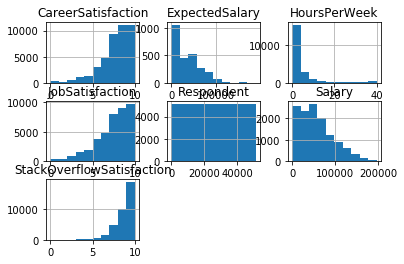

In [4]:
df.hist();

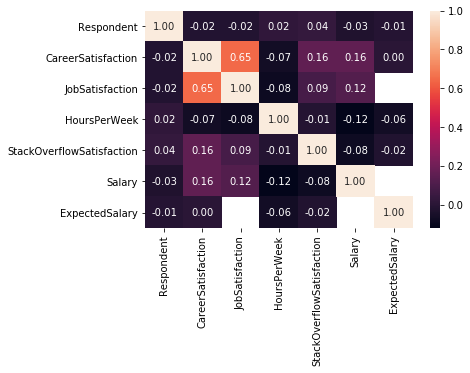

In [10]:
#heatmap:需要传入一个相关系数矩阵
sns.heatmap(df.corr(), annot=True, fmt='.2f');

In [30]:
#创建一个包含所有用来预测目标变量特征的DataFrame
df = df.fillna(0)
X = df[['CareerSatisfaction', 'JobSatisfaction', 'HoursPerWeek', 'StackOverflowSatisfaction']]
#创建一鞥需要进行预测的变量
Y = df['Salary']


#将数据分为训练集和测试集
#并传入 一个test_size控制测试集占比，表示测试集大小是原始数据集的30%
#以及一个随机数种子random_state,可以使得数据有着一定规律的随机性
X_train, X_test, Y_train, Y_test =train_test_split(X, Y, test_size=.3, random_state=42)


#实例化线性回归模型
#一般先将数据进行标准化处理(但是他的缺点是会使得特征变得没那么容易解读)
lm_model = LinearRegression(normalize=True)




In [31]:
Y_test.shape


(15418,)

In [32]:
#拟合模型
lm_model.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)